In [1]:
# importing libraris
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# data set path
DATA_PATH = r'../data/raw/Iris.csv'

In [3]:
# load the dataset
df = pd.read_csv(filepath_or_buffer=DATA_PATH)

In [4]:
# show the first 5 rows from the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# checking if there is any inconsistency in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


    As we see there are no null values in the dataset, so the data can be processed

In [6]:
# removing the unneeded column
df.drop(labels='Id', axis=1, inplace=True)

In [7]:
# show the first 5 rows from the dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Some Exploratory Data Analysis With Iris

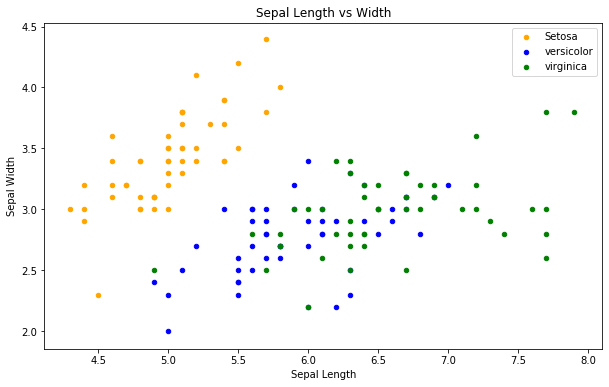

In [8]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='versicolor', ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length vs Width")
fig=plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

    The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

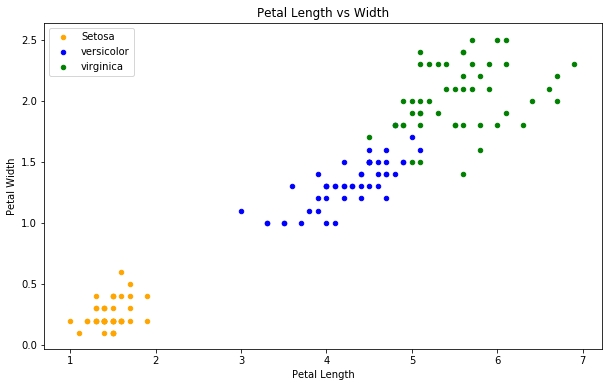

In [9]:
fig = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='blue', label='versicolor', ax=fig)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length vs Width")
fig=plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

    As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

### Now let us see how are the length and width are distributed

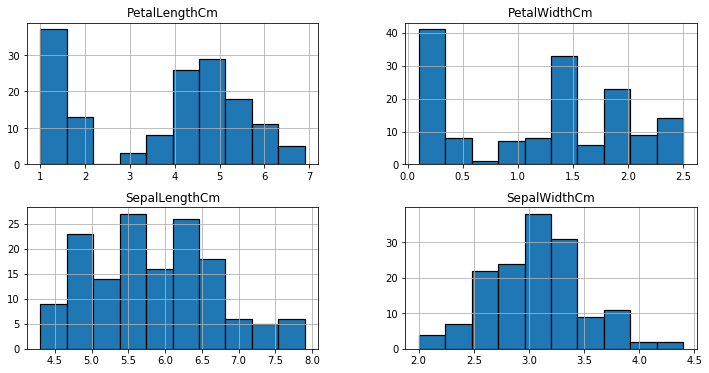

In [10]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

### Now let us see how the length and width vary according to the species

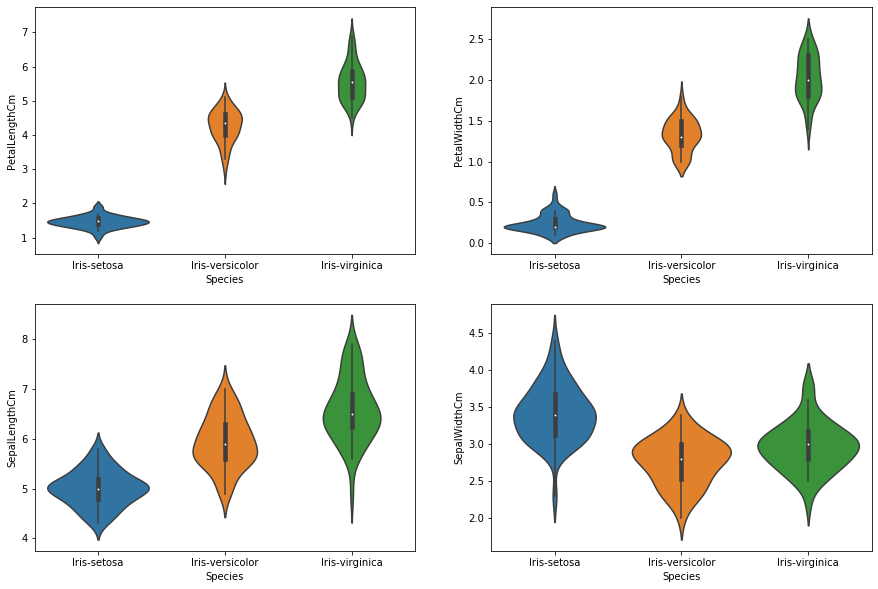

In [11]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.violinplot(x='Species', y='PetalLengthCm', data=df)
plt.subplot(2, 2, 2)
sns.violinplot(x='Species', y='PetalWidthCm', data=df)
plt.subplot(2, 2, 3)
sns.violinplot(x='Species', y='SepalLengthCm', data=df)
plt.subplot(2, 2, 4)
sns.violinplot(x='Species', y='SepalWidthCm', data=df)
plt.show()

    The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density.

### Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.

    Classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

    Regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.
    
    Before we start, we need to clear some ML notations.

    attributes --> An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.

    Target variable, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

In [12]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  # for Support Vector Machine (SVM) Algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using Decision Tree Algoithm

In [13]:
df.shape # get the shape of the dataset

(150, 5)

    Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

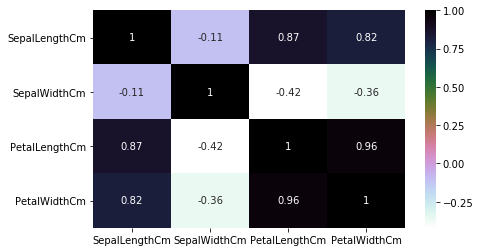

In [14]:
plt.figure(figsize=(7, 4)) 
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r') # draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

### Observation--->

    The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

    We will use all the features for training the algorithm and check the accuracy.

    Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

### Steps To Be followed When Applying an Algorithm
1. Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
2. Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
3. Then pass the training dataset to the algorithm to train it. We use the .fit() method
4. Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
5. We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [15]:
# Splitting The Data into Training And Testing Dataset
train, test = train_test_split(df, test_size = 0.3) # in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [16]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] # taking the training data features
train_y=train.Species # output of our training data
test_X= test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] # taking test data features
test_y =test.Species # output value of test data

    Lets check the Train and Test Dataset

In [17]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
120,6.9,3.2,5.7,2.3
25,5.0,3.0,1.6,0.2


In [18]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
49,5.0,3.3,1.4,0.2
44,5.1,3.8,1.9,0.4


In [19]:
train_y.head()  # output of the training data

120     Iris-virginica
25         Iris-setosa
144     Iris-virginica
135     Iris-virginica
82     Iris-versicolor
Name: Species, dtype: object

### Support Vector Machine (SVM)

In [20]:
model = svm.SVC() # select the algorithm
model.fit(train_X, train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) # now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:', metrics.accuracy_score(prediction, test_y)) # now we check the accuracy of the algorithm. 
# we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9777777777777777


c:\users\sunny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


    SVM is giving very good accuracy . We will continue to check the accuracy for different models.

    Now we will follow the same steps as above for training various machine learning algorithms.

### Logistic Regression

In [21]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction, test_y))

The accuracy of the Logistic Regression is 0.9111111111111111


c:\users\sunny\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sunny\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Decision Tree

In [22]:
model=DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction, test_y))

The accuracy of the Decision Tree is 0.9555555555555556


### K-Nearest Neighbours

In [23]:
model=KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbours for putting the new data into a class
model.fit(train_X, train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction, test_y))

The accuracy of the KNN is 0.9555555555555556


    Let's check the accuracy for various values of n for K-Nearest nerighbours

([<matplotlib.axis.XTick at 0x21f92b9d448>,
 <a list of 10 Text xticklabel objects>)

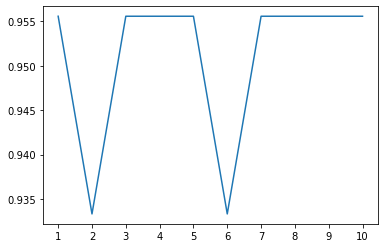

In [24]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
plt.xticks(x)
# plt.show()

    Above is the graph showing the accuracy for the KNN models using different values of n.

    We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

#### Creating Petals And Sepals Training Data

In [25]:
petal=df[['PetalLengthCm', 'PetalWidthCm', 'Species']]
sepal=df[['SepalLengthCm', 'SepalWidthCm', 'Species']]

In [26]:
train_p,test_p=train_test_split(petal, test_size=0.3, random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm', 'PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm', 'PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal, test_size=0.3, random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm', 'SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm', 'SepalLengthCm']]
test_y_s=test_s.Species

### SVM

In [27]:
model=svm.SVC()
model.fit(train_x_p, train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:', metrics.accuracy_score(prediction, test_y_p))

model=svm.SVC()
model.fit(train_x_s, train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


c:\users\sunny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\sunny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Logistic Regression

In [28]:
model = LogisticRegression()
model.fit(train_x_p, train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:', metrics.accuracy_score(prediction, test_y_p))

model.fit(train_x_s, train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.6888888888888889
The accuracy of the Logistic Regression using Sepals is: 0.6444444444444445


c:\users\sunny\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sunny\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\sunny\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sunny\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

### Decision Tree

In [29]:
model=DecisionTreeClassifier()
model.fit(train_x_p, train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:', metrics.accuracy_score(prediction, test_y_p))

model.fit(train_x_s, train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


### K-Nearest Neighbours

In [30]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p, train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:', metrics.accuracy_score(prediction, test_y_p))

model.fit(train_x_s, train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


## Observations:
Using Petals over Sepal for training the data gives a much better accuracy.
This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.
Thus we have just implemented some of the common Machine Learning. Since the dataset is small with very few features, I didn't cover some concepts as they would be relevant when we have many features.

I have compiled a notebook covering some advanced ML concepts using a larger dataset. Have a look at that tooo.